In [1]:
import os
import shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'keras'

In [23]:
# original dataset path
original_dataset_dir = 'C:/Users/MOHSEN/JupyterProjects/cv_homework/kaggle_original_data/train'

# creating a directory for smaller dataset
base_dir = 'C:/Users/MOHSEN/JupyterProjects/cv_homework/cats_and_dogs_big'
os.mkdir(base_dir)

In [24]:
# creating a directory for train data
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# creating a directory for validation data
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# creating a directory for test data
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [25]:
# creating a directory for cats in training data
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# creating a directory for dogs in training data
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [26]:
# creating a directory for cats in validation data
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# creating a directory for dogs in validation data
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [27]:
# creating a directory for cats in test data
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# creating a directory for dogs in test data
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [28]:
# copying the first 7500 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [29]:
# copying the next 2500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(7500, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [30]:
# copying the next 2500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
# copying the first 7500 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [32]:
# copying the next 2500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(7500, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [33]:
# copying the next 2500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [50]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 7500
total training dog images: 7500
total validation cat images: 2500
total validation dog images: 2500
total test cat images: 2500
total test dog images: 2500


In [51]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [53]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


In [54]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=50, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')

Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [55]:
history = model.fit_generator(train_generator, steps_per_epoch=300, epochs=30,
                              validation_data=validation_generator, validation_steps=100)

Epoch 1/30
300/300 [==============================] - 195s 649ms/step - loss: 0.6340 - acc: 0.6277 - val_loss: 0.5725 - val_acc: 0.7135
Epoch 2/30
300/300 [==============================] - 193s 644ms/step - loss: 0.5477 - acc: 0.7188 - val_loss: 0.5158 - val_acc: 0.7465
Epoch 3/30
300/300 [==============================] - 193s 643ms/step - loss: 0.4936 - acc: 0.7623 - val_loss: 0.5354 - val_acc: 0.7300
Epoch 4/30
300/300 [==============================] - 192s 640ms/step - loss: 0.4560 - acc: 0.7877 - val_loss: 0.4606 - val_acc: 0.7865
Epoch 5/30
300/300 [==============================] - 208s 693ms/step - loss: 0.4243 - acc: 0.8071 - val_loss: 0.4215 - val_acc: 0.8095
Epoch 6/30
300/300 [==============================] - 214s 714ms/step - loss: 0.3975 - acc: 0.8211 - val_loss: 0.4108 - val_acc: 0.8090
Epoch 7/30
300/300 [==============================] - 197s 655ms/step - loss: 0.3762 - acc: 0.8324 - val_loss: 0.4234 - val_acc: 0.8055
Epoch 8/30
300/300 [============================

In [56]:
model.save('cats_and_dogs_small_1.h5')

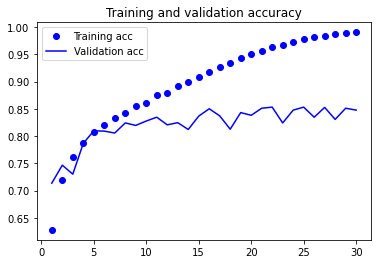

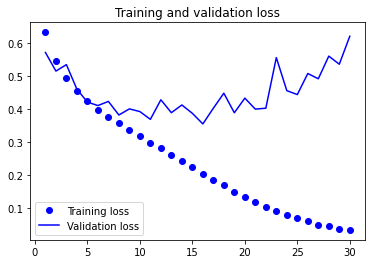

In [57]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

, kernel_constraint=maxnorm(3)

model.add(layers.BatchNormalization())